<a href="https://colab.research.google.com/github/Pongpang-2102/Programming_and_Data_Science_Project_2022-2024/blob/main/Puriwat_Diabetes_Prediction_Homework_Regression_(Part2_Logistic_Regression)_(25_Sep_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework (Linear Regression & Logistic Regression Analysis)

- Subject : Applied Statistical Modeling & Data Analytics  (K-DAI)
- Due date : 28-Sep-22
- Author : Puriwat Sangrawee ( นายภูริวัฒน์ แสงระวี)
- Student ID : 65056071


- This file is part 2 of total 2 parts



# Part 2. Logistic Regression 

## 2.1 Dateset Reference

- ในการวิเคราะห์ข้อมูลด้วย Linear Regresssion ผมใช้ Dataset จาก Kaggle ในหัวข้อเรื่อง `Pima Indians Diabetes Database` 

-  โดยสามารถ download dataset นีได้จาก https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?fbclid=IwAR2W8j52SPXMLzWTYYxXvhJEjWi5I5XWDtR8SqCJkA5zp8F9sZkDU3EDudA

## 2.2 Step of Study

### 2.2.0 Import Dataset , Neccessary Library  and Data Overview

In [ ]:
# import libarary

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn import linear_model as LM
from sklearn.linear_model import LogisticRegression  ,LinearRegression, LassoCV, RidgeCV , Ridge , Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# to read file and store it at object df
df = pd.read_csv('/content/drive/MyDrive/# K-Dai Dataset/diabetes.csv')

# to view the number of row and column for this dataframe
print("Number of  Row and column :\nRow = ",df.shape[0],"\nColumn =",df.shape[1] )

Number of  Row and column :
Row =  768 
Column = 9


In [ ]:
# to view all column name
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# to view data head
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# to view data tail
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# to view overall info of this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2.2.1 Splitting data 

- Split data to be 2 subgroup `training_data` and  `testing_data` respectively

In [ ]:
# split date to df_train (training_set) and df_test (testing set) using ratio for train : test = 80 : 20
# this case we will set seed using number 
df_train , df_test = train_test_split(df , test_size = 0.2 , random_state = 1994)

### 2.2.2 Basic Statistical Analysis for All Variables

- Number of Samples
- Missing Value
- Central Tendency (Mean , Median . Mode , Standard Deviation SD) 
- Quatile (Q2 , Q3)

#### 2.2.2.1 Whole Dataset

In [ ]:
# to view overall statistics  of whole dataset (100%)

# to view Mean , SD , Q1 - Q3 , max , min , count of whole dataset (df)
df.describe()

# 25% and 75% are 25th Percentile and 75th Percentile (AKA Q2 and Q3 respectively)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# to view median of whole dataset 
df.median()


Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
# to view mode of whole dataset
df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


#### 2.2.2.2 Training data

In [ ]:
# to view shape of df_train 
df_train.shape

(614, 9)

In [ ]:
# to view overall statistics  of Training data (80%)

# to view Mean , SD , Q1 - Q3 , max , min , count of df_train
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.838762,121.166124,68.796417,20.876221,83.597720,32.139739,0.472925,33.221498,0.340391
std,3.415500,32.464237,20.102574,15.921842,119.941813,7.996628,0.335747,11.743998,0.474227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.400000,0.382500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,131.500000,36.775000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# to view median of Training data (df_train)
df_train.median()


Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      37.0000
BMI                          32.4000
DiabetesPedigreeFunction      0.3825
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
# to view mode of Training data (df_train)
df_train.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,99,70,0,0,32.0,0.254,22,0


#### 2.2.2.3 Testing Data

In [ ]:
# to view shape of df_test
df_test.shape

(154, 9)

In [ ]:
# to view overall statistics  of testing data (20%)

# to view Mean , SD , Q1 - Q3 , max , min , count of df_test
df_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,154.00000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.87013,119.811688,70.337662,19.181818,64.655844,31.405844,0.467695,33.318182,0.383117
std,3.19047,30.008881,16.035182,16.053202,93.019387,7.414640,0.314108,11.862890,0.487733
min,0.00000,44.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.00000,99.000000,64.000000,0.000000,0.000000,27.000000,0.245000,24.000000,0.000000
50%,3.00000,115.000000,70.000000,21.000000,0.000000,31.200000,0.348000,29.000000,0.000000
75%,5.75000,141.000000,82.000000,32.000000,113.750000,35.575000,0.640750,39.750000,1.000000
max,13.00000,196.000000,102.000000,52.000000,579.000000,49.300000,1.600000,68.000000,1.000000


In [ ]:
# to view median of testing data (df_test)
df_test.median()

Pregnancies                   3.000
Glucose                     115.000
BloodPressure                70.000
SkinThickness                21.000
Insulin                       0.000
BMI                          31.200
DiabetesPedigreeFunction      0.348
Age                          29.000
Outcome                       0.000
dtype: float64

In [ ]:
# to view mode of testing data (df_test)
df_test.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,111.0,70.0,0.0,0.0,29.7,0.245,21.0,0.0
1,NaN,NaN,NaN,NaN,NaN,30.8,NaN,24.0,NaN
2,NaN,NaN,NaN,NaN,NaN,31.2,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,33.3,NaN,NaN,NaN


### 2.2.3 Missing Value Detection & Elimination

#### 2.2.3.1 Missing Value Detection

In [ ]:
# to check nunmber of missing value
df.isna().sum().sum()

0

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 2.2.3.2 Missing Value Elimination

- No Missing value found : Elimination is no needed

### 2.2.4 Exploratory Data Analysis (EDA) of your variable Y

#### 2.2.4.1 Define your X (Independent variable)

In [ ]:
# to view column  name in df_train
df_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# first time selection for X , All column (but quality) will be selected

# quality column (select value = 1 for column mode) will be dropped (It will be our target later)

# Define x for model training
x_train = df_train.drop('Outcome',1)
print("col X_train :",x_train.columns)

print("----------------------------\n")

# Define X for model testing
x_test = df_test.drop('Outcome',1)
print("col X_test :",x_test.columns)


col X_train : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
----------------------------

col X_test : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


#### 2.2.4.1 Define your Y (Dependent Variable)

In [ ]:
# define y for training data
y_train = df_train['Outcome']

y_train.head()


5      0
210    0
588    1
554    0
466    0
Name: Outcome, dtype: int64

In [ ]:
# define Y for testing data
y_test = df_test['Outcome']
y_test.head()


659    1
183    0
536    0
212    0
496    0
Name: Outcome, dtype: int64

#### 2.2.4.2 EDA for Your Y

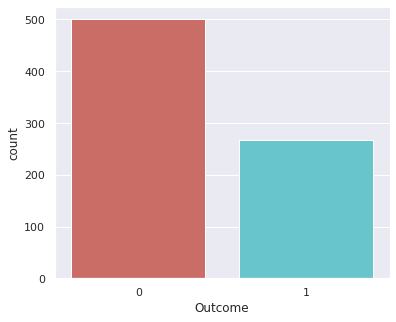

In [ ]:
# we will use histrogram to view our diabetes possibilities distribution

# explo_count = ['Outcome']
sns.set(style="darkgrid")
fig , axs = plt.subplots(1,figsize = (6,5))
sns.countplot(x= 'Outcome', data = df , palette = 'hls')


### 2.2.5 Ask your own good Questions

#### 2.2.5.1 Your own Questions

- Q1. How Glucose level affected with Diabetes Possibility
- Q2. What is the most age range for Diabetes Possibility
- Q3. How BMI affected with Diabetes Possibility

#### 2.2.5.2 Use Visualization to answer my own question

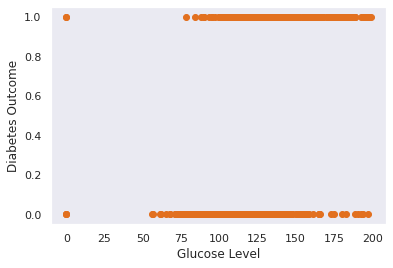

In [ ]:
# Q1. How Glucose level affected with Diabetes Possibility
plt.scatter(  df_train['Glucose'], df_train['Outcome'] ,  color = '#E2701F')
plt.xlabel('Glucose Level')
plt.ylabel('Diabetes Outcome')
plt.grid()
plt.show()


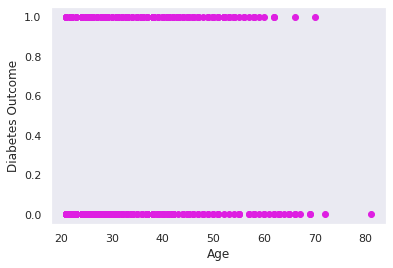

In [ ]:
# Q2. What is the most age range for Diabetes Possibility
plt.scatter(  df_train['Age'], df_train['Outcome'] ,  color = '#DE1FE2')
plt.xlabel('Age')
plt.ylabel('Diabetes Outcome')
plt.grid()
plt.show()

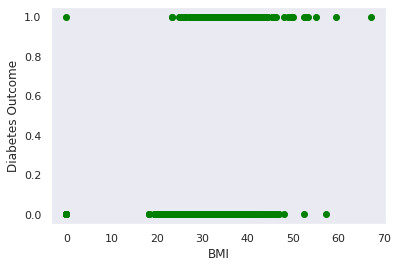

In [ ]:
# Q3. How BMI affected with Diabetes Possibility

plt.scatter(  df_train['BMI'], df_train['Outcome'] ,  color = 'green')
plt.xlabel('BMI')
plt.ylabel('Diabetes Outcome')
plt.grid()
plt.show()

### 2.2.6  Correlation Representation

- between independent variable (X) and Dependent Variable (Y)

#### 2.2.6.1 Pearson Correlation

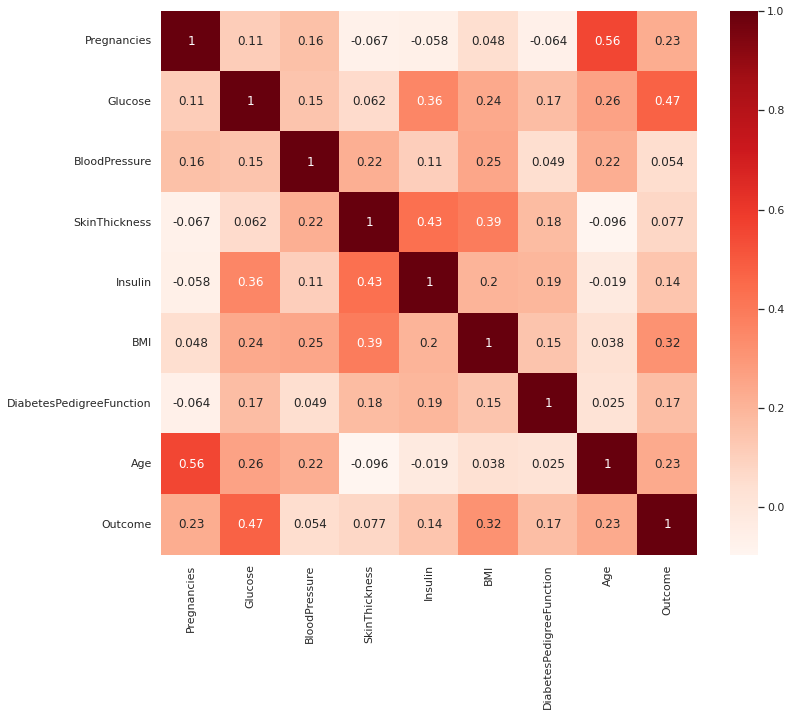

In [ ]:
# Using Pearson Correlation to view overall relationship between each other within df_train
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 2.2.7 Data preparation

#### 2.2.7.1 Dummy Creation

In [ ]:
# dummy Creation for traing data
x_train_dummy = pd.get_dummies(x_train).copy()
x_train_dummy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
5,5,116,74,0,0,25.6,0.201,30
210,2,81,60,22,0,27.7,0.290,25
588,3,176,86,27,156,33.3,1.154,52
554,1,84,64,23,115,36.9,0.471,28
466,0,74,52,10,36,27.8,0.269,22


In [ ]:
# to view its column 
x_train_dummy_features = x_train_dummy.columns
x_train_dummy_features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
# dummy Creation for testing data
x_test_dummy = pd.get_dummies(x_test).copy()
x_test_dummy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
659,3,80,82,31,70,34.2,1.292,27
183,5,73,60,0,0,26.8,0.268,27
536,0,105,90,0,0,29.6,0.197,46
212,7,179,95,31,0,34.2,0.164,60
496,5,110,68,0,0,26.0,0.292,30


In [ ]:
# to view its column 
x_test_dummy_features = x_train_dummy.columns
x_test_dummy_features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### 2.2.8 Creating Equation & Evaluate its Perfomance

#### 2.2.8.1 General Form (Pure Logistic Equation)

- Without any Penalty (No Ridge or Lasso)

In [ ]:
# create a logistic equation
# start with general form 
LR_classification_none_01 = LogisticRegression(penalty='none', max_iter = 300 , solver = 'newton-cg')
LR_classification_none_01 .fit(x_train_dummy , y_train)

LR_classification_none_02 = LogisticRegression(penalty='none', max_iter = 300 , solver = 'lbfgs')
LR_classification_none_02 .fit(x_train_dummy , y_train)

LR_classification_none_03 = LogisticRegression(penalty='none', max_iter = 300 , solver = 'sag')
LR_classification_none_03 .fit(x_train_dummy , y_train)

LR_classification_none_04 = LogisticRegression(penalty='none', max_iter = 300 , solver = 'saga')
LR_classification_none_04 .fit(x_train_dummy , y_train)


LogisticRegression(max_iter=300, penalty='none', solver='saga')

In [ ]:
# input x_test to our equation to predict y
y_pred_none_01 = LR_classification_none_01.predict(x_test_dummy)
y_pred_none_02 = LR_classification_none_02.predict(x_test_dummy)
y_pred_none_03 = LR_classification_none_03.predict(x_test_dummy)
y_pred_none_04 = LR_classification_none_04.predict(x_test_dummy)

print("Result for Newton-cg without Penalty variables :\n")
print(y_pred_none_01, "\n")

print("Result for  lbfgs without Penalty variables :\n")
print(y_pred_none_02, "\n")

print("Result for  sag without Penalty variables :\n")
print(y_pred_none_03, "\n")

print("Result for saga without Penalty variables :\n")
print(y_pred_none_04, "\n")


Result for Newton-cg without Penalty variables :

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0] 

Result for  lbfgs without Penalty variables :

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0] 

Result for  sag without Penalty variables :

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0
 

In [ ]:
# to view result confusion matrix 
print("Result for Newton-cg without Penalty variables :\n")
print(confusion_matrix(y_test,y_pred_none_01))

print("Result for  lbfgs without Penalty variables :\n")
print(confusion_matrix(y_test,y_pred_none_02))

print("Result for  sag without Penalty variables :\n")
print(confusion_matrix(y_test,y_pred_none_03))

print("Result for saga without Penalty variables :\n")
print(confusion_matrix(y_test,y_pred_none_04))

Result for Newton-cg without Penalty variables :

[[86  9]
 [31 28]]
Result for  lbfgs without Penalty variables :

[[86  9]
 [31 28]]
Result for  sag without Penalty variables :

[[85 10]
 [44 15]]
Result for saga without Penalty variables :

[[86  9]
 [46 13]]


In [ ]:
# to view model performance (compare between y_test & y predicted from our equation)

print("01. % Result for Newton-cg without Penalty variables :\n")
print(classification_report(y_test,y_pred_none_01),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_none_01)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

print("02. % Result for  lbfgs without Penalty variables :\n")
print(classification_report(y_test,y_pred_none_02),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_none_02)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

print("03. % Result for  sag without Penalty variables :\n")
print(classification_report(y_test,y_pred_none_03),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_none_03)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

print("04. % Result for saga without Penalty variables :\n")
print(classification_report(y_test,y_pred_none_04),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_none_04)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

01. % Result for Newton-cg without Penalty variables :

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        95
           1       0.76      0.47      0.58        59

    accuracy                           0.74       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.74      0.74      0.72       154
 

LR Accuracy 74.03%
------------------------------------------------------------

02. % Result for  lbfgs without Penalty variables :

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        95
           1       0.76      0.47      0.58        59

    accuracy                           0.74       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.74      0.74      0.72       154
 

LR Accuracy 74.03%
------------------------------------------------------------

03. % Result for  sag without Penalty variables :

              precis

#### 2.2.8.2 General Form + L1 (Lasso Regression)

In [ ]:
# create a logistic equation
# lasso 
LR_classification_l1_01 = LogisticRegression(penalty='l1', max_iter = 300 , solver = 'liblinear')
LR_classification_l1_01 .fit(x_train_dummy , y_train)
LR_classification_l1_02 = LogisticRegression(penalty='l1', max_iter = 300 , solver = 'saga')
LR_classification_l1_02  .fit(x_train_dummy , y_train)


y_pred_l1_01 = LR_classification_l1_01.predict(x_test_dummy)
y_pred_l1_02 = LR_classification_l1_02.predict(x_test_dummy)

print("01. Result for liblinear with Lasso Regression :\n")
print(y_pred_l1_01, "\n")

print("02. Result for  saga  with Lasso Regression :\n")
print(y_pred_l1_02, "\n")
print("------------------------------------------------------------\n")

# to view result confusion matrix 

print("Result for liblinear with Lasso Regression :\n")
print(confusion_matrix(y_test,y_pred_l1_01))

print("Result for  saga  with Lasso Regression :\n")
print(confusion_matrix(y_test,y_pred_l1_02))


01. Result for liblinear with Lasso Regression :

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 1 0 0] 

02. Result for  saga  with Lasso Regression :

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0] 

------------------------------------------------------------

Result for liblinear with Lasso Regression :

[[86  9]
 [34 25]]
Result for  saga  with Lasso Regression :

[[86  9]
 [46 13]]


In [ ]:
# to view model performance (compare between y_test & y predicted from our equation)

print("01. Result for liblinear with Lasso Regression :\n")
print(classification_report(y_test,y_pred_l1_01),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_l1_01)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

print("02. Result for  saga  with Lasso Regression :\n")
print(classification_report(y_test,y_pred_l1_02),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_l1_02)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))

01. Result for liblinear with Lasso Regression :

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        95
           1       0.74      0.42      0.54        59

    accuracy                           0.72       154
   macro avg       0.73      0.66      0.67       154
weighted avg       0.72      0.72      0.70       154
 

LR Accuracy 72.08%
------------------------------------------------------------

02. Result for  saga  with Lasso Regression :

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        95
           1       0.59      0.22      0.32        59

    accuracy                           0.64       154
   macro avg       0.62      0.56      0.54       154
weighted avg       0.63      0.64      0.59       154
 

LR Accuracy 64.29%


#### 2.2.8.3 General Form + L2 (Ridge Regression)

In [ ]:
# create a logistic equation
# ridge form
LR_classification_ridge_01 = LogisticRegression(penalty='l2', max_iter = 300 , solver = 'newton-cg')
LR_classification_ridge_01 .fit(x_train_dummy , y_train)

LR_classification_ridge_02 = LogisticRegression(penalty='l2', max_iter = 300 , solver = 'lbfgs')
LR_classification_ridge_02 .fit(x_train_dummy , y_train)

LR_classification_ridge_03 = LogisticRegression(penalty='l2', max_iter = 300 , solver = 'sag')
LR_classification_ridge_03 .fit(x_train_dummy , y_train)

LR_classification_ridge_04 = LogisticRegression(penalty='l2', max_iter = 300 , solver = 'saga')
LR_classification_ridge_04 .fit(x_train_dummy , y_train)


# input x_test to our equation to predict y
y_pred_ridge_01 = LR_classification_ridge_01.predict(x_test_dummy)
y_pred_ridge_02 = LR_classification_ridge_02.predict(x_test_dummy)
y_pred_ridge_03 = LR_classification_ridge_03.predict(x_test_dummy)
y_pred_ridge_04 = LR_classification_ridge_04.predict(x_test_dummy)


print("Result for Newton-cg with Ridge Regression :\n")
print(y_pred_ridge_01, "\n")

print("Result for  lbfgs with Ridge Regressio :\n")
print(y_pred_ridge_02, "\n")

print("Result for  sag with Ridge Regressio :\n")
print(y_pred_ridge_03, "\n")

print("Result for saga with Ridge Regressio :\n")
print(y_pred_ridge_04, "\n")


# to view confusion matrix
print("Result for Newton-cg with Ridge Regression :\n")
print(confusion_matrix(y_test,y_pred_ridge_01))

print("Result for  lbfgs with Ridge Regression :\n")
print(confusion_matrix(y_test,y_pred_ridge_02))

print("Result for  sag with Ridge Regression :\n")
print(confusion_matrix(y_test,y_pred_ridge_03))

print("Result for saga with Ridge Regression :\n")
print(confusion_matrix(y_test,y_pred_ridge_04))

Result for Newton-cg with Ridge Regression :

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0] 

Result for  lbfgs with Ridge Regressio :

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0] 

Result for  sag with Ridge Regressio :

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 0 1 1 0 0 

In [ ]:
# to view model performance (compare between y_test & y predicted from our equation)
print("01. % Result for Newton-cg without Penalty variables :\n")
print(classification_report(y_test,y_pred_ridge_01),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_ridge_01)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

print("02. % Result for  lbfgs without Penalty variables :\n")
print(classification_report(y_test,y_pred_ridge_02),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_ridge_02)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

print("03. % Result for  sag without Penalty variables :\n")
print(classification_report(y_test,y_pred_ridge_03),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_ridge_03)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

print("04. % Result for saga without Penalty variables :\n")
print(classification_report(y_test,y_pred_ridge_04),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_ridge_04)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

01. % Result for Newton-cg without Penalty variables :

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        95
           1       0.74      0.44      0.55        59

    accuracy                           0.73       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.73      0.73      0.71       154
 

LR Accuracy 72.73%
------------------------------------------------------------

02. % Result for  lbfgs without Penalty variables :

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        95
           1       0.74      0.44      0.55        59

    accuracy                           0.73       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.73      0.73      0.71       154
 

LR Accuracy 72.73%
------------------------------------------------------------

03. % Result for  sag without Penalty variables :

              precis

#### 2.2.8.4 General Form with Lasso & Ridge Combined

In [ ]:
# start to create an equation in conbined factor
LR_classification_combined = LogisticRegression(l1_ratio =0.5 ,penalty='elasticnet', max_iter = 300 , solver = 'saga' )
LR_classification_combined .fit(x_train_dummy , y_train)

y_pred_combined = LR_classification_combined.predict(x_test_dummy)

# input x_test to our equation to predict y
print("Result for saga with Regulaization factor combined :\n")
print(y_pred_combined , "\n")


# to view confusion matrix
print("Result for saga with Regulaization factor combined :\n")
print(confusion_matrix(y_test,y_pred_combined))



Result for saga with Regulaization factor combined :

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0] 

Result for saga with Regulaization factor combined :

[[86  9]
 [46 13]]


In [ ]:
print("04. % Result for saga without Penalty variables :\n")
print(classification_report(y_test,y_pred_combined ),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_combined)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))
print("------------------------------------------------------------\n")

04. % Result for saga without Penalty variables :

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        95
           1       0.59      0.22      0.32        59

    accuracy                           0.64       154
   macro avg       0.62      0.56      0.54       154
weighted avg       0.63      0.64      0.59       154
 

LR Accuracy 64.29%
------------------------------------------------------------



#### 2.2.8.2 Selecting the best Logistic  Regression Model

- Using `lbfgs without any penalties ` is our best method ( Higest recall : the higher recall --> the higher rate of symtom found but many model shown the good recall value so  , we must to consider at F1 score instad -- > the best model is still be same answer)

### 2.2.9 Interprete the logistic Regression Coefficient of your best model (in Odd form)

In [ ]:
print("Result for  lbfgs without Penalty variables :\n")
confusion_matrix(y_test,y_pred_none_02)

Result for  lbfgs without Penalty variables :



array([[86,  9],
       [31, 28]])

In [ ]:
print("02. % Result for  lbfgs without Penalty variables :\n")
print(classification_report(y_test,y_pred_none_02),"\n")
LR_predict_acc = accuracy_score(y_test,y_pred_none_02)
print('LR Accuracy {:.2f}%'.format(LR_predict_acc*100))

02. % Result for  lbfgs without Penalty variables :

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        95
           1       0.76      0.47      0.58        59

    accuracy                           0.74       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.74      0.74      0.72       154
 

LR Accuracy 74.03%


In [ ]:
print("Result for  lbfgs without Penalty variables :\n")
our_matrix = confusion_matrix(y_test,y_pred_none_02)
model_pred_diabetes_found = our_matrix[0][0]
model_pred_diabetes_not_found = our_matrix[1][0]
odds_model = model_pred_diabetes_found / model_pred_diabetes_not_found

#actual_diabetes_found = our_matrix[0][1]
#actual_diabetes_not_found = our_matrix[1][1]
#odds_actual = actual_diabetes_found / actual_diabetes_not_found

print("Odds of our best model = {:.2f} ".format(odds_model))

Result for  lbfgs without Penalty variables :

Odds of our best model = 2.77 


### 2.2.10 Choose your best model for prediction

- the given values as shown below


In [ ]:
print("Result for  lbfgs without Penalty variables :\n")
print(y_pred_none_02, "\n")


Result for  lbfgs without Penalty variables :

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0] 

